# 📊 IPO Analysis of ETF Tickers  

In this notebook, we analyze the tickers listed in the **`merged_tickers.csv`** file to determine their **Initial Public Offering (IPO) dates**.  
This step is important because:  

- It allows us to identify which tickers are **recently listed**.  
- By filtering out newer tickers, we can ensure a **longer and more consistent analysis period** across all companies.  
- This foundation will later help us focus only on stocks with sufficient historical data for deeper trend and performance analysis.  


### 📦 Importing Required Libraries
We import the main Python libraries needed for our analysis:
- **pandas**: for data manipulation and handling CSV files  
- **yfinance**: to fetch stock data, IPO info, and historical prices  
- **matplotlib**: for data visualization and plotting charts 

In [27]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import os

### 📂 Load the CSV File  

We load the **`merged_tickers.csv`** file into a pandas DataFrame, we display the first few rows using `.head()` to confirm the dataset has loaded correctly.  


In [2]:
file_path = r"D:\MIT\Develop_Workflow\ELO2\ai-bubble-research\Data_collection\merged_tickers.csv" # Update with your actual file path
top_holdings_df = pd.read_csv(file_path)
top_holdings_df.head()

,Ticker,Name
0,QCOM,QUALCOMM INC
1,FB,FACEBOOK INC-CLASS A
2,SHOP,SHOPIFY INC - CLASS A
3,3690 HK,MEITUAN DIANPING-CLASS B
4,AMD,ADVANCED MICRO DEVICES


### 🛠️ Standardizing Tickers and Extracting IPO Dates  

In this step, we:  
1. **Rename columns** for clarity and consistency.  
2. **Drop rows with missing tickers** to avoid errors.  
3. **Standardize ticker formats**:  
   - Different exchanges use different suffixes (e.g., `.HK` for Hong Kong, `.DE` for Germany, `.T` for Tokyo).  
   - Some tickers need **manual remapping** because Yahoo Finance uses slightly different codes.  
4. Define helper functions:  
   - `get_ipo_date(ticker)`: Fetches the IPO date using Yahoo Finance, falling back to the earliest historical price if needed.  
   - `fix_ticker_format(ticker)`: Corrects ticker symbols using a custom mapping dictionary.  
5. Build an **IPO dictionary** mapping each original ticker to its IPO date.  


In [30]:
# Standardize columns
top_holdings_df.columns = ["Ticker", "Name"]

# Drop rows with missing tickers
top_holdings_df = top_holdings_df.dropna(subset=["Ticker"])

tickers = top_holdings_df["Ticker"].unique().tolist()
manual_map = {
    "700.HK": "0700.HK",       # Tencent (leading zero)
    "SIE.GR": "SIE.DE",        # Siemens
    "IFX.GR": "IFX.DE",        # Infineon Technologies
    "6702.JP": "6702.T",       # Fujitsu
    "5803.JP": "5803.T",       # Fujikura
    "EXPN.LN": "EXPN.L",       # Experian
    "6701.JP": "6701.T",       # NEC Corp
    "4755.JP": "4755.T",       # Rakuten
    "WKL.NA": "WKL.AS",        # Wolters Kluwer
    "3443.TT": "3443.TW",      # Taiwanese stock
    "TIETO.FH": "TIETO.HE",    # TietoEVRY
    "6954.JP": "6954.T",       # Fanuc
    "6526.JP": "6526.T",       # Socionext
    "6588.JP": "6588.T",       # Toshiba Tec
    "2353.TT": "2353.TW",      # Acer
    "2395.TT": "2395.TW",      # Advantech
    "AMP.IM": "AMP.MI",        # Amplifon
    "STM.IM": "STM.MI",        # STMicroelectronics (Milan)
    "HEXAB.SS": "HEXAB.ST",    # Hexagon AB (Stockholm)
    "OTEX.CN": "OTEX.TO",      # OpenText (Toronto)
    "XRO.AU": "XRO.AX",        # Xero Ltd (Australia)
    "CCC.LN": "CCC.L",         # Computacenter (London)
    "SOW.GR": "SOW.DE",        # Software AG (Germany)
    "ENR.GR": "ENR.DE",        # Energiekontor AG (Germany)
    "DLG.GR": "DLG.DE",        # Dialog Semiconductor
    "UBI.FP": "UBI.PA",        # Unibail-Rodamco-Westfield (Paris)
    "AVV.LN": "AVV.L",         # AVEVA Group (London)
    "2344.TT": "2344.TW",      # Taiwanese stock
    "2337.TT": "2337.TW",      # Taiwanese stock
    "8299.TT": "8299.TW",      # Taiwanese stock
    "3665.TT": "3665.TW",      # Taiwanese stock
    "3661.TT": "3661.TW",      # Taiwanese stock
    "6502.JP": "6502.T",       # Toshiba
}


def get_ipo_date(ticker):
    try:
        stock = yf.Ticker(ticker)
        ipo_ts = stock.info.get("firstTradeDateEpochSeconds", None)
        if ipo_ts:
            return pd.to_datetime(ipo_ts, unit="s").date()
        hist = stock.history(period="max")
        if not hist.empty:
            return hist.index[0].date()
    except Exception as e:
        return None
    return None

def fix_ticker_format(ticker):
    # Convert spaces to dots (Yahoo's format)
    ticker = ticker.replace(" ", ".")
    if ticker in manual_map:
        return manual_map[ticker]
    return ticker


# Build dictionary
ipo_dict = {}
for ticker in tickers:
    yf_ticker = fix_ticker_format(ticker)
    ipo_dict[yf_ticker] = get_ipo_date(yf_ticker)


print(ipo_dict)

$SPLK: possibly delisted; no timezone found
$TWTR: possibly delisted; no timezone found
$STM.MI: possibly delisted; no timezone found
$XLNX: possibly delisted; no timezone found
$HEXAB.ST: possibly delisted; no price data found  (1d 1926-11-01 -> 2025-10-07)
$6502.T: possibly delisted; no timezone found
$NLOK: possibly delisted; no timezone found
$FEYE: possibly delisted; no timezone found
$ZEN: possibly delisted; no timezone found
$ENV: possibly delisted; no timezone found
$NUAN: possibly delisted; no timezone found
$NLSN: possibly delisted; no timezone found
$JNPR: possibly delisted; no timezone found
$SOW.DE: possibly delisted; no timezone found
$LOGM: possibly delisted; no timezone found
$CSOD: possibly delisted; no timezone found
$PLAN: possibly delisted; no timezone found
$CLDR: possibly delisted; no timezone found
HTTP Error 404: {"quoteSummary":{"result":null,"error":{"code":"Not Found","description":"Quote not found for symbol: 8299.TW"}}}
$8299.TW: possibly delisted; no timez

{'QCOM': datetime.date(1991, 12, 13), 'FB': datetime.date(2025, 6, 26), 'SHOP': datetime.date(2015, 5, 20), '3690.HK': datetime.date(2018, 9, 20), 'AMD': datetime.date(1980, 3, 17), 'NVDA': datetime.date(1999, 1, 22), '005930.KS': datetime.date(2000, 1, 4), 'CRM': datetime.date(2004, 6, 23), 'AMZN': datetime.date(1997, 5, 15), 'MSFT': datetime.date(1986, 3, 13), 'ADBE': datetime.date(1986, 8, 13), 'NFLX': datetime.date(2002, 5, 23), 'SIE.DE': datetime.date(1996, 11, 8), 'NOW': datetime.date(2012, 6, 29), 'BABA': datetime.date(2014, 9, 19), 'CSCO': datetime.date(1990, 2, 16), 'ORCL': datetime.date(1986, 3, 12), 'GOOGL': datetime.date(2004, 8, 19), 'IBM': datetime.date(1962, 1, 2), '0700.HK': datetime.date(2004, 6, 16), 'INTC': datetime.date(1980, 3, 17), 'UBER': datetime.date(2019, 5, 10), 'NOC': datetime.date(1981, 12, 31), 'EBAY': datetime.date(1998, 9, 24), 'TRI': datetime.date(2002, 6, 12), 'BIDU': datetime.date(2005, 8, 5), 'IFX.DE': datetime.date(2000, 3, 13), 'EXPN.L': datetime.d

### 🧾 Identify Delisted or Unavailable Tickers

The following snippet filters out tickers whose IPO dates could not be retrieved
(using the `ipo_dict` generated earlier).  
These tickers are likely **delisted**, **acquired**, or **unavailable** on Yahoo Finance.

In [31]:
delisted_tickers = []

for ticker in tickers:
    yf_ticker = fix_ticker_format(ticker)
    if ipo_dict[yf_ticker] is None:
        delisted_tickers.append(ticker)
        ipo_dict.pop(yf_ticker, None)
print('Number of delisted tickers:', len(delisted_tickers))
print("Delisted or unavailable tickers:", delisted_tickers)

28
Delisted or unavailable tickers: ['SPLK', 'TWTR', 'STM IM', 'XLNX', 'HEXAB SS', '6502 JP', 'NLOK', 'FEYE', 'ZEN', 'ENV', 'NUAN', 'NLSN', 'JNPR', 'SOW GR', 'LOGM', 'CSOD', 'PLAN', 'CLDR', '8299 TT', 'SMAR', 'DLG GR', 'ABMD', '4488 JP', '763 HK', 'AVV LN', 'EXAI', 'STMMI IM', '25557878D TT']


### IPO Distribution Analysis  

After extracting IPO dates for each ticker, we convert them into a DataFrame and analyze the distribution of IPOs over time.  
To do this, we:  
1. Convert the ticker–IPO date dictionary into a structured DataFrame.  
2. Parse and standardize the IPO dates.  
3. Extract the IPO year for each company.  
4. Plot a histogram to visualize how many companies went public in each year.  

This helps us understand whether most tickers are recent IPOs or if they have a long trading history — important when deciding which tickers to exclude for long-term analysis.  


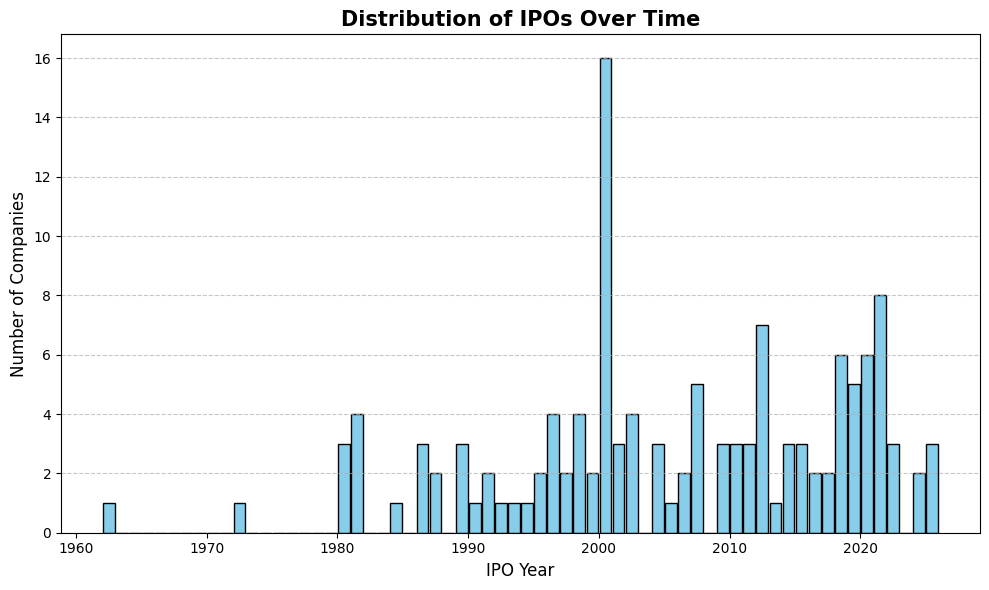

In [32]:
# Convert dict → DataFrame
IPO_date_df = pd.DataFrame(list(ipo_dict.items()), columns=["Ticker", "IPO_Date"])
IPO_date_df["IPO_Date"] = pd.to_datetime(IPO_date_df["IPO_Date"])

# Extract just the year
IPO_date_df["Year"] = IPO_date_df["IPO_Date"].dt.year

# Histogram of IPOs per year
plt.figure(figsize=(10,6))
plt.hist(IPO_date_df["Year"], bins=range(IPO_date_df["Year"].min(), IPO_date_df["Year"].max()+2), 
         color="skyblue", edgecolor="black", rwidth=0.9)

plt.xlabel("IPO Year", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)
plt.title("Distribution of IPOs Over Time", fontsize=15, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

### Cumulative IPO Counts for Key Years (2015–2025)

In this section, we calculate the **cumulative number of tickers that IPO’d before selected years**: 2015, 2016, 2017, 2018, 2019, 2020, and 2025.  

We chose these years because the **AI industry experienced a breakout period between 2015 and 2020**, marked by major advances in deep learning, the rise of large-scale datasets, and the deployment of AI into real-world applications.  
By including 2025, we also capture the most recent cumulative state of IPOs in our dataset, allowing us to understand how the ticker universe expanded during and after this key period.  

We will present the results in both a **table** and a **graph** to highlight how the number of available companies for analysis grew over time.


,Year,Cumulative_IPOs
0,2015,95
1,2016,97
2,2017,99
3,2018,105
4,2019,110
5,2020,116
6,2025,132


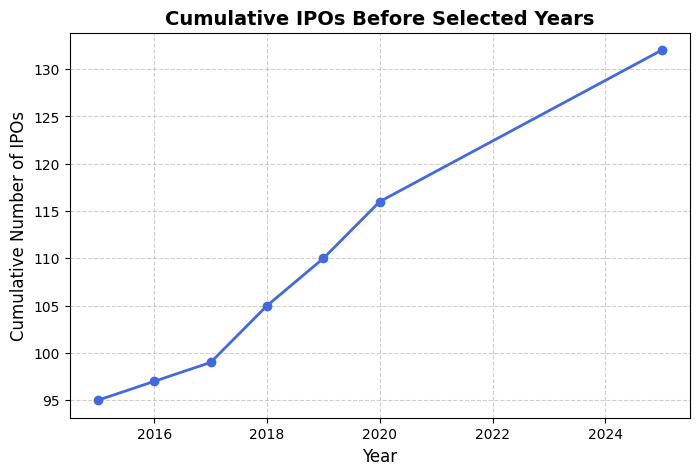

In [33]:
# Define target years
target_years = [2015, 2016, 2017, 2018, 2019, 2020, 2025]

# Count cumulative IPOs up to each year
cumulative_counts = []
for year in target_years:
    count = (IPO_date_df["Year"] <= year).sum()
    cumulative_counts.append(count)

# Create a DataFrame for display
cum_df = pd.DataFrame({
    "Year": target_years,
    "Cumulative_IPOs": cumulative_counts
})

display(cum_df)

# Plot cumulative IPOs over selected years
plt.figure(figsize=(8,5))
plt.plot(cum_df["Year"], cum_df["Cumulative_IPOs"], marker="o", color="royalblue", linewidth=2)

plt.xlabel("Year", fontsize=12)
plt.ylabel("Cumulative Number of IPOs", fontsize=12)
plt.title("Cumulative IPOs Before Selected Years", fontsize=14, fontweight="bold")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


### Identifying Recently Listed Companies (2015–2025)

In this step, we merge the IPO date information back with the original company names from our dataset.  
By filtering for IPOs that occurred between **2015 and 2025**, we can highlight companies that only appeared in the market relatively recently.  

This gives us **better insight into which stocks are “new players”** in the AI investment space. Such companies may not have long trading histories, which could introduce bias or distortions if we were to include them in a long-term performance analysis.  

The resulting table provides a clear overview of these recent IPOs along with their company names and listing dates.


In [26]:
# Merge IPO info back with original company names
ipo_with_names = IPO_date_df.merge(
    top_holdings_df[["Ticker", "Name"]],  # use original dataframe with names
    on="Ticker",
    how="left"
)

# Filter IPOs between 2020 and 2025
recent_ipos = ipo_with_names[(ipo_with_names["Year"] >= 2015) & (ipo_with_names["Year"] <= 2025)]

# Display as table
print(recent_ipos[["Ticker", "Name", "IPO_Date"]])

      Ticker                       Name   IPO_Date
1         FB       FACEBOOK INC-CLASS A 2025-06-26
2       SHOP      SHOPIFY INC - CLASS A 2015-05-20
3    3690.HK                        NaN 2018-09-20
21      UBER      UBER TECHNOLOGIES INC 2019-05-10
28      TWLO             TWILIO INC - A 2016-06-23
34      SNAP               SNAP INC - A 2017-03-02
37       TTD           TRADE DESK INC-A 2016-09-21
38      CRWD           CROWDSTRIKE HO-A 2019-06-12
42       HPE              HEWLETT PACKA 2015-10-19
47       TME           TENCENT MUSI-ADR 2018-12-12
50      STNE              STONECO LTD-A 2018-10-25
62      PSTG             PURE STORAGE-A 2015-10-06
66    ENR.DE                        NaN 2020-09-29
73      OKTA                   OKTA INC 2017-04-07
74        ZS                ZSCALER INC 2018-03-16
76      DDOG      DATADOG INC - CLASS A 2019-09-19
80       CAN                 CANAAN INC 2019-11-20
87      AFYA           AFYA LTD-CLASS A 2019-07-19
95      CGNT       COGNYTE SOFT

In [34]:

input_file = r"D:\MIT\Develop_Workflow\ELO2\ai-bubble-research\Data_collection\merged_tickers.csv"   # ← change this path
output_file = os.path.join(os.path.dirname(input_file), "merged_tickers_IPO.csv")

# LOAD EXISTING DATA 
df = pd.read_csv(input_file)

# PROCESS EACH TICKER
ipo_years = []

for _, row in df.iterrows():
    raw_ticker = row["Ticker"]
    fixed_ticker = fix_ticker_format(raw_ticker)
    ipo_date = ipo_dict.get(fixed_ticker)
    ipo_years.append(ipo_date.year if ipo_date else None)

# Add the new IPO_Year column
df["IPO_Year"] = ipo_years

# === SAVE TO NEW CSV ===
df.to_csv(output_file, index=False)

print(f"✅ Merged file saved: {output_file}")
print(f"Total tickers processed: {len(df)}")
print(f"Found IPO years: {df['IPO_Year'].notna().sum()}")
print(f"Missing IPO years: {df['IPO_Year'].isna().sum()}")


✅ Merged file saved: D:\MIT\Develop_Workflow\ELO2\ai-bubble-research\Data_collection\merged_tickers_IPO.csv
Total tickers processed: 160
Found IPO years: 132
Missing IPO years: 28
